# Actividad 01: Pandas y Scikit Learn

Durante esta actividad trabajaremos con los datos del Sistema Nacional de Información Municipal del gobierno de Chile. Vamos a trabajar con dos fuentes de datos:

- Un archivo `.csv` llamado `presupuesto_2019.csv`, que contiene información sobre el presupuesto municipal, para cada una de las comunas de Chile. 
- Un archivo `.csv` llamado `datos_comunas.csv` que contiene la información sobre, los metros de plazas y los metros de parques de cada municipalidad. Además, existe información sobre la cantidad de personas que trabajan en ese municipio. Para ver la diferencia entre parques y plazas, pensar en que el Cerro San Cristóbal es un parque, y que la Plaza de Armas es una plaza.

La idea de este control es hacer un análisis de datos en torno a la siguiente pregunta:

> ¿Cómo se relacionan los metros de áreas verdes y el tamaño del personal de las municipalidades con su presupuesto?

Para la parte obligatoria de esta tarea trabajaremos solo con las áreas verdes. Dejamos el trabajo con el personal como un ejercicio propuesto.

## Tareas a realizar

En esta actividad debes hacer una regresión lineal en base a los datos que te entregamos. Ten cuidado: puede ser que los datos estén sucios, pues son llenados por humanos. Es tu responsabilidad limpiar esos datos: para las siguientes tareas no debes tomar en cuenta datos nulos o que no han sido reportados (aunque eso signifique dejar fuera algunas comunas).

### Parte 1 - Entendiendo los datos \[3.5 pts\]

Primero vamos a cargar los _datasets_ y entenderlos mediante visualizaciones. En esta parte tienes las siguientes tareas:

- Carga los archivos `.csv` con Pandas como `DataFrames`.
- Crea un gráfico de puntos para visualizar la correlación entre el presupuesto de las comunas y la superficie en metros cuadrados de plazas con la que cuentan esas comunas. Entrega el coeficiente de correlación entre esos dos campos. 
- Crea un gráfico de puntos para visualizar la correlación entre el presupuesto de las comunas y la superficie en metros cuadrados **total** de áreas verdes, es decir, sumando plazas con parques. Entrega el coeficiente de correlación entre esos dos campos.
- En base a esos dos experimentos, argumenta qué campo es mejor para ser utilizado en una regresión: la superficie de plazas o la superficie de plazas sumadas con parques.

Además debes describir los pasos que sigues en cada uno de los puntos.


### Parte 2 - Regresión lineal \[2.5 pts\]

Sea $S$ el indicador de superficie que elegiste en la parte anterior (ya sea plazas o suma de plazas con parques). Entrega un modelo de regresión que te permita predecir el presupuesto de una comuna, en función de $S$. Luego muestra los resultados de validar tu modelo con _cross-validation_, dividiendo el _dataset_ en 5 partes iguales.

Luego discute el rendimiento de tu modelo. ¿Crees que es bueno? ¿Crees que puede mejorar?

### Parte 3 (Bonus) - Regresión multivariable \[0.5 pts\]

Busca como implementar una regresión cuando la respuesta depende de más de un parámetro. Ajusta ahora un modelo en el que el presupuesto no depende solo de los metros cuadrados de áreas verdes, sino que también del número de personas que trabaja en esa municipalidad. ¿Crees que tu modelo quedó mejor? ¿Cómo podrías probarlo?
Además, en caso de que mejore el rendimiento, te recomendamos revisar algunos outliers del dataset de áreas verdes (como ciertas municipalidades que tienen parques demasiado grandes). 

## Detalles académicos

Este control es individual. La entrega de este control debe ser un archivo comprimido donde se encuentre un **Jupyter Notebook**, junto a cualquier archivo .csv que estés llamando desde tu código. **La fecha de entrega es hasta miércoles 2 de septiembre, hasta las 11:00 am, cualquier entrega después de este plazo será calificada con la nota mínima**. La nota se calcula como el número de puntos + un punto base. El archivo comprimido se entrega en un cuestionario de Webcursos.

 # Solución
 
Parte 1


Grafico de puntos: Presupuesto vs Metros de Plaza


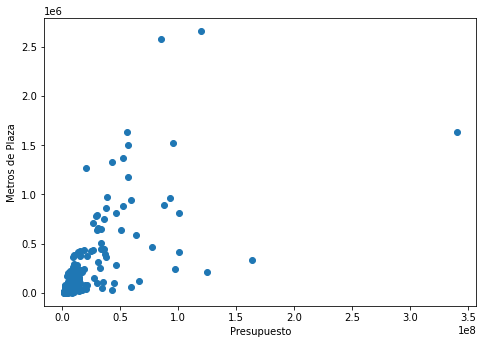

              Presupuesto  metros_plaza
Presupuesto      1.000000      0.664989
metros_plaza     0.664989      1.000000 

Grafico de puntos: Presupuesto vs Suma de Areas Verdes


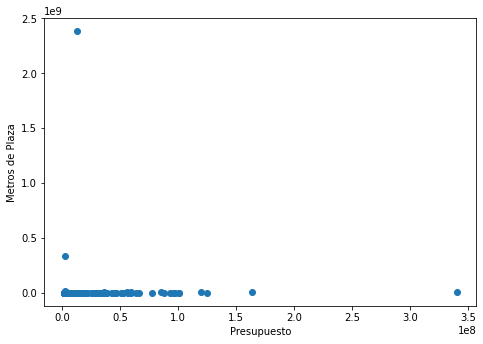

                   Presupuesto  Suma_Areas_Verdes
Presupuesto            1.00000           -0.00675
Suma_Areas_Verdes     -0.00675            1.00000 



In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#Cada una de  las funciones cumple mostrar el grafico de puntos y luego mostrár las correlaciones de las variables
def grafico_1 (datos):
  print("Grafico de puntos: Presupuesto vs Metros de Plaza")
  Cor = datos[['Presupuesto','metros_plaza']]
  correlacion = Cor.corr()
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.scatter(merge['Presupuesto'],merge['metros_plaza'])
  ax.set_xlabel('Presupuesto')
  ax.set_ylabel('Metros de Plaza')
  plt.show()
  return correlacion

def grafico_2 (datos):
  print("Grafico de puntos: Presupuesto vs Suma de Areas Verdes")
  Cor = datos[['Presupuesto','Suma_Areas_Verdes']]
  correlacion = Cor.corr()
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.scatter(merge['Presupuesto'],merge['Suma_Areas_Verdes'])
  ax.set_xlabel('Presupuesto')
  ax.set_ylabel('Metros de Plaza')
  plt.show()
  return correlacion

#Ingresamos dataframe comunas y la limpiamos
comunas = pd.read_csv('datos_comunas.csv')
comunas = comunas.dropna()

#Ingresamos dataframe presupuesto y lo limpiamos respecto a los 'No Recepecionados'
presupuesto = pd.read_csv('presupuesto_2019.csv', encoding = 'latin_1')
presupuesto = presupuesto.dropna()#por si acaso
presupuesto = presupuesto[presupuesto['Presupuesto'] != 'No Recepcionado']
presupuesto['Presupuesto'] = pd.to_numeric(presupuesto['Presupuesto'])

#unimos los dataframes para poder crear los graficos y luego creamos la nueva columna (suma de los metros cuadrados)
merge =pd.merge(presupuesto, comunas, left_on='CODIGO', right_on='id')
print(grafico_1(merge), "\n")

merge['Suma_Areas_Verdes'] = merge['metros_parque'] + merge['metros_plaza']

print(grafico_2(merge), "\n")

Al conseguir los dos graficos con sus respectivas correlaciones podemos ver de forma grafica como por el numero que obtenemos que la variable metros_plaza nos es más util, ya que su correlación es mucho más alta y cerca que con la variable Suma_Areas_Verdes

Parte 2

In [ ]:
#Para poder trabajar con la regresion lineal, debemos entregarle un arreglo bidimensional, por lo que lo creamos acontinuación
def Regresion_Lineal(datos):
  arreglo =[]
  for x, j in zip(datos['metros_plaza'],datos['Presupuesto']):
      arreglo.append([x,j])
  #lococamos el 15% de los datos para el test por que parece razonable
  train_set, test_set = train_test_split(arreglo, test_size=0.15)
  #esto es para despues
  #Al revisar como trabaja LinearRegression. trasformamos nuestros datos al formado de array que requiere para funcionar
  train_set = np.asarray(train_set)
  test_set = np.asarray(test_set)

  lin_reg = LinearRegression()#no cambie el nombre por comodidad, pero podria llamarse juanito y seguiria funcionando

  #aquí separamos las variables para que cada una para entregarla despues
  first = train_set[:, [True, False]]
  second = train_set[:, [False, True]]
  #Esta es la parte de Cross-Validation
  scores = cross_val_score(lin_reg, first, second, scoring='neg_mean_squared_error', cv=5)
  lin_rmse_scores = np.sqrt(-scores)

  lin_reg.fit(first, second)

  print("Primer numero: ",lin_reg.predict([[100000]]))
  print("Numero por 5:  ",lin_reg.predict([[100000*5]]))
  print("Numero por 10: ",lin_reg.predict([[100000*10]]))
  print("Cero:          ",lin_reg.predict([[0]]))

  print("El modelo fue entrenado y con la función lin_reg.predict podra ver sus resultados \n")
  return "Promedio: "+ str(lin_rmse_scores.mean()) + " Desviacion Estandar: "+str(lin_rmse_scores.std())+"\n"

#Utilizamos 59072234 por que es el primer numero del arreglo, podriamos usar cualquiera y los resultados deberian seguir siendo lineales
print(Regresion_Lineal(merge))



Primer numero:  [[11516736.69461115]]
Numero por 5:   [[33653285.40378827]]
Numero por 10:  [[61323971.29025968]]
Cero:           [[5982599.51731686]]
El modelo fue entrenado y con la función lin_reg.predict podra ver sus resultados 

Promedio: 21399587.113551043 Desviacion Estandar: 9237072.31116584



El modelo al evaluarlo tiene un comportamiento lineal, ya que va aumentando progresivamente los numeros, sin embargo me preocupa que sin presupuesto exista una plaza de 42180 metros cuadrados. A su vez gracias a *Cross-Validation* podemos ver que la desviación estandar es alta, por lo que el modelo no es el mejor, pero al menos funciona.

Parte 3


In [ ]:
def Regresion_Lineal_Extra(datos):
  arreglo =[]
  for x, j, w in zip(datos['metros_plaza'],datos['personas'],datos['Presupuesto']):
      arreglo.append([x,j,w])
  #lococamos el 15% de los datos para el test por que parece razonable
  train_set, test_set = train_test_split(arreglo, test_size=0.15)
  #Al revisar como trabaja LinearRegression. trasformamos nuestros datos al formado de array que requiere para funcionar
  train_set = np.asarray(train_set)
  test_set = np.asarray(test_set)

  lin_nueva = LinearRegression()#ahora si cambio el nombre para que se distinga de la otra

  #aquí separamos las variables para que cada una para entregarla despues
  first = train_set[:, [True, True, False]]
  second = train_set[:, [False, False, True]]
  lin_nueva.fit(first, second)
  print("Primer numero con 10: ",lin_nueva.predict([[59072234,10]]))
  print("Primer numero con 20: ",lin_nueva.predict([[59072234,10*2]]))
  print("Numero por 10 con 10: ",lin_nueva.predict([[59072234*10,10]]))
  print("Cero por 10:          ",lin_nueva.predict([[0,10]]))
  return "Funcionó"

Regresion_Lineal_Extra(merge)

Primer numero con 10:  [[1.52360982e+09]]
Primer numero con 20:  [[1.52504191e+09]]
Numero por 10 con 10:  [[1.52467367e+10]]
Cero por 10:           [[-1182057.53838286]]


'Funcionó'

Por lo que podemos corroborar al ver los resultados nos damos cuenta que la variable en si puede llegar a ser relevante respecto a la decision de la regresion multivariable. Para hacer la prueba lo mejor es utilizar los datos de testeo en ambas regresiones, por lo cual eliminaré las funciones y dejaré todo planteado para tener definidas las dos regresiones

In [ ]:
arreglo =[]
for x, j in zip(merge['metros_plaza'],merge['Presupuesto']):
    arreglo.append([x,j])
#lococamos el 15% de los datos para el test por que parece razonable
train_set1, test_set1 = train_test_split(arreglo, test_size=0.15)
#Al revisar como trabaja LinearRegression. trasformamos nuestros datos al formado de array que requiere para funcionar
train_set1 = np.asarray(train_set1)
lin_uno = LinearRegression()#no cambie el nombre por comodidad, pero podria llamarse juanito y seguiria funcionando

first = train_set1[:, [True, False]]
second = train_set1[:, [False, True]]
lin_uno.fit(first, second)

arreglo2 =[]
for x, j, w in zip(merge['Presupuesto'],merge['personas'],merge['metros_plaza']):
    arreglo2.append([x,j,w])
#lococamos el 15% de los datos para el test por que parece razonable
train_set2, test_set2 = train_test_split(arreglo2, test_size=0.15)
train_set2 = np.asarray(train_set2)
#Al revisar como trabaja LinearRegression. trasformamos nuestros datos al formado de array que requiere para funcionar
train_set2 = np.asarray(train_set2)
test_set2=np.asarray(test_set2)
lin_dos = LinearRegression()#ahora si cambio el nombre para que se distinga de la otra

#aquí separamos las variables para que cada una para entregarla despues
first2 = train_set2[:, [True, True, False]]
second2 = train_set2[:, [False, False, True]]

lin_dos.fit(first2, second2)
#Utilizaremos el test de prueba de la regresion 
prueba = test_set2[:, [True, True, False]]
respuesta=test_set2[:, [False, False, True]]

#por ultimo solo haremos una prueba de cada unp de los valores y luego corroborar respecto a la cercania del valor obtenido versus el que nos dá en el test
contador=0
for dato, output in zip(prueba,respuesta):
  print("Valor=",output, "Lineal=",lin_uno.predict([[dato[0]]]),"Multivariable=",lin_dos.predict([[dato[0],dato[1]]]))
  if (output-lin_uno.predict([[dato[0]]]))**2 < (output- lin_dos.predict([[dato[0],dato[1]]]))**2:
    contador+=1
print("La prueba nos dio que la regression lineal es mejor en",contador,"sobre",len(prueba))


Valor= [432498.] Lineal= [[251990.48256549]] Multivariable= [[367983.0407945]]
Valor= [231241.] Lineal= [[161473.67963625]] Multivariable= [[143143.25150153]]
Valor= [68122.] Lineal= [[102647.8559497]] Multivariable= [[96997.27205748]]
Valor= [19850.] Lineal= [[160345.07133189]] Multivariable= [[165894.40997991]]
Valor= [21812.] Lineal= [[70184.13070504]] Multivariable= [[45412.22451214]]
Valor= [19448.] Lineal= [[73154.06666368]] Multivariable= [[50392.25647533]]
Valor= [32972.] Lineal= [[169836.31551358]] Multivariable= [[195501.95054057]]
Valor= [13151.] Lineal= [[104331.85067149]] Multivariable= [[89917.60123513]]
Valor= [40000.] Lineal= [[80112.7052618]] Multivariable= [[53864.02679155]]
Valor= [112173.] Lineal= [[141993.3213303]] Multivariable= [[182630.28168007]]
Valor= [33629.] Lineal= [[89602.81481232]] Multivariable= [[78366.5283299]]
Valor= [18182.] Lineal= [[86950.9486122]] Multivariable= [[74612.70964866]]
Valor= [1200.] Lineal= [[70652.28263656]] Multivariable= [[54902.22

Al parecer al ingresar a las personas como una variable en la regresion, nos permitió llegar a un resultado más acercado a lo esperado.